# Load Data

In [1]:
import pandas as pd
pd.options.display.max_columns = 999
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb


plt.style.use("fivethirtyeight")
%matplotlib inline

In [2]:
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Text(0.5, 1.0, 'Histogram')

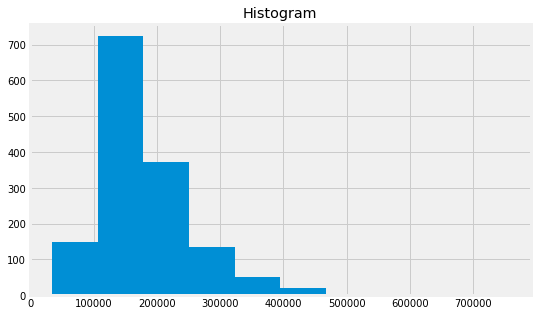

In [6]:
plt.figure(figsize=(8,5))
plt.hist(df["SalePrice"])
plt.title("Histogram")

Text(0.5, 1.0, 'Scatter Plot')

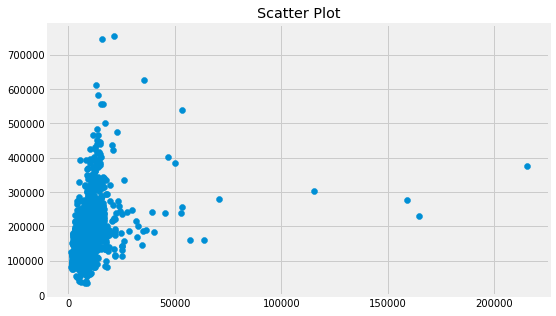

In [8]:
plt.figure(figsize=(8,5))
plt.scatter(df["LotArea"],df["SalePrice"])
plt.title("Scatter Plot")

Text(0.5, 1.0, 'Bar Chart')

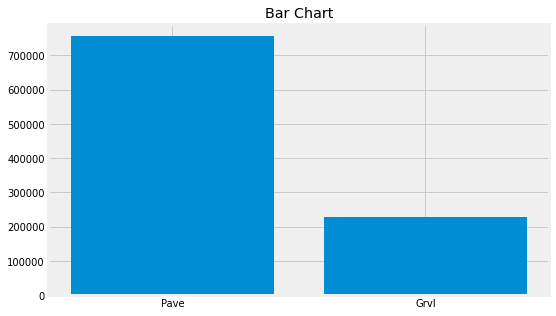

In [10]:
plt.figure(figsize=(8,5))
plt.bar(df["Street"],df["SalePrice"])
plt.title("Bar Chart")

# EDA

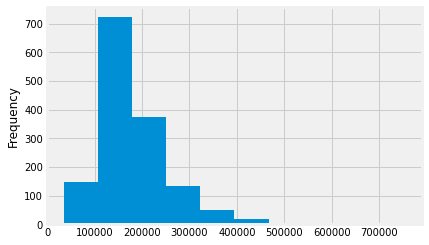

In [247]:
df.SalePrice.plot.hist()

In [7]:
missing_data = df.isnull().sum()

In [3]:
df.shape

(1460, 81)

In [5]:
df.isnull().sum().sum()

6965

In [8]:
missing_data[missing_data > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Missing Value

In [12]:
missing_data_prop = missing_data[missing_data > 0]/len(df) * 100
missing_data_prop

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

### Handle Missing Data : Remove Columns with more than 80% missing value 

In [13]:
missing_80 = missing_data_prop[missing_data_prop >=80].index
df = df.drop(missing_80,axis=1)
df.shape

(1460, 77)

In [14]:
# Separate Categorical and Numeric Data
df_cat = df.select_dtypes(include = ["object"])
df_num = df.select_dtypes(include = ["float64","int64"])

In [15]:
missing_num = df_num.isnull().sum()/len(df) * 100
missing_num = missing_num[missing_num > 0]
missing_num

LotFrontage    17.739726
MasVnrArea      0.547945
GarageYrBlt     5.547945
dtype: float64

In [16]:
missing_num_cols = missing_num[missing_num != 0].index
missing_num_cols

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

### Check Distribution Columns with Missing Value 

/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


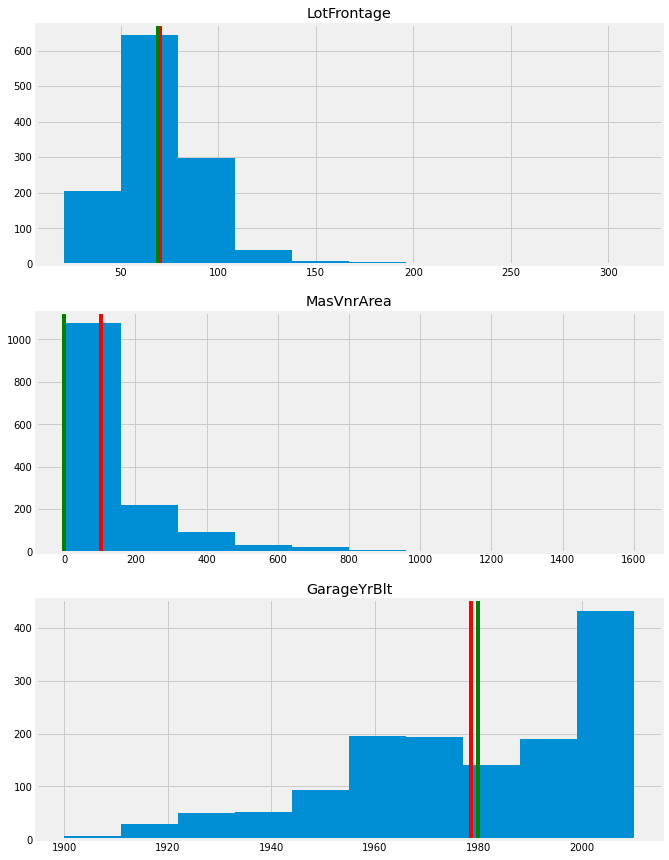

In [17]:
plt.figure(figsize=(10,15))
for i,col in enumerate(missing_num_cols):
    plt.subplot(3,1,i+1)
    plt.hist(df_num[col])
    plt.axvline(df_num[col].mean(),color="red")
    plt.axvline(df_num[col].median(),color="green")
    plt.title(col)
    
    

### Handle Missing Numeric Value: Imputing with Mean 

In [18]:
fill_num = ['LotFrontage', 'MasVnrArea']

for col in fill_num:
    df_num[col] = df_num[col].fillna(df_num[col].mean())

/Users/sangga/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [19]:
# drop year garage
df_num = df_num.drop("GarageYrBlt",axis=1)

In [20]:
# Check for low var categorical data
num_unique = df_cat.nunique().sort_values(ascending=True)
unique_less_10 = num_unique[num_unique < 10].index
unique_more_10 = num_unique[num_unique > 10].index

for col in unique_less_10 :
    print("{0}: {1}".format(col,df_cat[col].value_counts(normalize=True)*100))
    


Street: Pave    99.589041
Grvl     0.410959
Name: Street, dtype: float64
CentralAir: Y    93.493151
N     6.506849
Name: CentralAir, dtype: float64
Utilities: AllPub    99.931507
NoSeWa     0.068493
Name: Utilities, dtype: float64
GarageFinish: Unf    43.872371
RFn    30.601885
Fin    25.525743
Name: GarageFinish, dtype: float64
LandSlope: Gtl    94.657534
Mod     4.452055
Sev     0.890411
Name: LandSlope, dtype: float64
PavedDrive: Y    91.780822
N     6.164384
P     2.054795
Name: PavedDrive, dtype: float64
BsmtQual: TA    45.607871
Gd    43.429375
Ex     8.503162
Fa     2.459592
Name: BsmtQual, dtype: float64
ExterQual: TA    62.054795
Gd    33.424658
Ex     3.561644
Fa     0.958904
Name: ExterQual, dtype: float64
MasVnrType: None       59.504132
BrkFace    30.647383
Stone       8.815427
BrkCmn      1.033058
Name: MasVnrType, dtype: float64
KitchenQual: TA    50.342466
Gd    40.136986
Ex     6.849315
Fa     2.671233
Name: KitchenQual, dtype: float64
BsmtCond: TA    92.129304
Gd     

# Feature Engineering 

In [21]:
df_num.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [28]:
# Create new features
df_num["house_age"] = df_num["YrSold"] - df_num["YearBuilt"]
df_num["remod_agg"] = df_num["YrSold"]- df_num["YearRemodAdd"]  
df_num["totalFullBath"] = df_num["FullBath"] + df_num["BsmtFullBath"]
df_num["totalHalfBath"] = df_num["HalfBath"] + df_num["BsmtHalfBath"]
df_num["totalLivArea"] = df_num["MasVnrArea"] + df_num["GrLivArea"] + df_num["GarageArea"] + df_num["PoolArea"]

In [31]:
df_num[df_num.remod_agg < 0]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,house_age,remod_agg,totalFullBath,totalHalfBath,totalLivArea
523,524,60,130.0,40094,10,5,2007,2008,762.0,2260,0,878,3138,3138,1538,0,4676,1,0,3,1,3,1,11,1,3,884,208,406,0,0,0,0,0,10,2007,184750,0,-1,4,1,6322.0


In [32]:
# remove remod_agg with value less than 1
df_num = df_num.drop(524,axis=0)

KeyError: '[524] not found in axis'

In [33]:
corrmap_sale = df_num.corr()["SalePrice"]
corrmap_sale[corrmap_sale.abs() > 0.4]

OverallQual      0.791120
YearBuilt        0.522581
YearRemodAdd     0.506978
MasVnrArea       0.473747
TotalBsmtSF      0.613446
1stFlrSF         0.605855
GrLivArea        0.708054
FullBath         0.560418
TotRmsAbvGrd     0.533341
Fireplaces       0.466749
GarageCars       0.639718
GarageArea       0.622690
SalePrice        1.000000
house_age       -0.523012
remod_agg       -0.508920
totalFullBath    0.582284
totalLivArea     0.786072
Name: SalePrice, dtype: float64

In [104]:
var_data = df_num.var()
var_more_5 = var_data[var_data > 5].index

In [144]:
features =corrmap_sale[corrmap_sale.abs() > 0.4].index

In [145]:
features

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'SalePrice', 'house_age', 'remod_agg'],
      dtype='object')

In [16]:
var = df_num.var()
var[var > 0.3]

Id               1.777550e+05
MSSubClass       1.789338e+03
LotFrontage      5.897492e+02
LotArea          9.962565e+07
OverallQual      1.912679e+00
OverallCond      1.238322e+00
YearBuilt        9.122154e+02
YearRemodAdd     4.262328e+02
MasVnrArea       3.278497e+04
BsmtFinSF1       2.080255e+05
BsmtFinSF2       2.602391e+04
BsmtUnfSF        1.952464e+05
TotalBsmtSF      1.924624e+05
1stFlrSF         1.494501e+05
2ndFlrSF         1.905571e+05
LowQualFinSF     2.364204e+03
GrLivArea        2.761296e+05
FullBath         3.035082e-01
BedroomAbvGr     6.654938e-01
TotRmsAbvGrd     2.641903e+00
Fireplaces       4.155947e-01
GarageYrBlt      6.095825e+02
GarageCars       5.584797e-01
GarageArea       4.571251e+04
WoodDeckSF       1.570981e+04
OpenPorchSF      4.389861e+03
EnclosedPorch    3.735550e+03
3SsnPorch        8.595059e+02
ScreenPorch      3.108889e+03
PoolArea         1.614216e+03
MiscVal          2.461381e+05
MoSold           7.309595e+00
YrSold           1.763837e+00
SalePrice 

## Categorical Data

In [34]:
df_cat.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [169]:
df_cat = df_cat.drop(missing_cat_75,axis=1)
df_cat.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [35]:
missing_cat = df_cat.isnull().sum()/len(df) * 100 
missing_cat = missing_cat[missing_cat > 0]
missing_cat

MasVnrType       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
dtype: float64

In [36]:
df_cat = df_cat.drop("FireplaceQu",axis=1)

In [38]:
missing_cat = df_cat.isnull().sum()/len(df) * 100 
missing_cat = missing_cat[missing_cat > 0]
missing_cat

GarageType      5.547945
GarageFinish    5.547945
GarageQual      5.547945
GarageCond      5.547945
dtype: float64

### Handle Categorical Missing Value : impute with mode 

In [39]:
for col in missing_cat.index :
    df_cat[col] = df_cat[col].fillna(df_cat[col].mode()[0])

## Correlation 

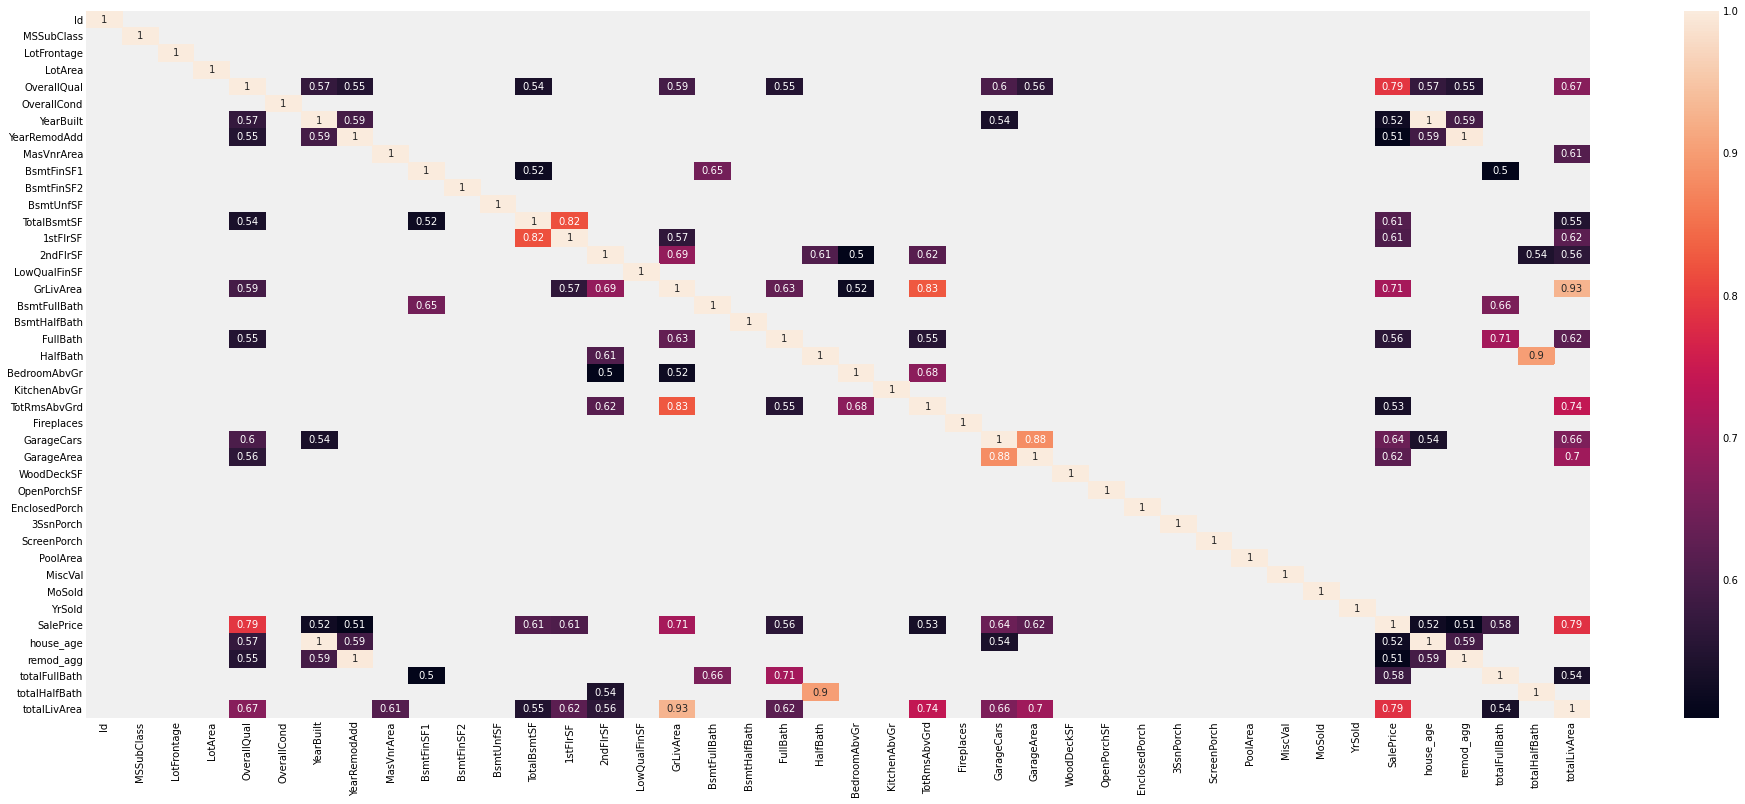

In [40]:
plt.figure(figsize=(30,13))
corrmap= df_num.corr()
corrmap_big = corrmap[corrmap.abs()>0.5].abs()
sns.heatmap(corrmap_big,annot=True)

In [41]:
x_cols = corrmap_big["SalePrice"][corrmap_big["SalePrice"]>0].index

In [42]:
x_cols

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice', 'house_age', 'remod_agg', 'totalFullBath', 'totalLivArea'],
      dtype='object')

In [173]:
unique_ness = df_cat.nunique()
unique_2 = unique_ness[unique_ness==2].index
unique_lot = unique_ness[unique_ness!=2].index

for col in unique_ness.index:
    test = pd.get_dummies(df_cat[col],prefix=col)
    df_cat = pd.concat([df_cat,test],axis=1)
    df_cat = df_cat.drop(col,axis=1)
    ## Correlation 

plt.figure(figsize=(30,13))
corrmap= df_num.corr()
corrmap_big = corrmap[corrmap.abs()>0.5].abs()
sns.heatmap(corrmap_big,annot=True)

x_cols = corrmap_big["SalePrice"][corrmap_big["SalePrice"]>0].index

x_cols

# Summary what I done to data 

In [223]:
def transform_features(df):
    df_cat = df.select_dtypes(include = ["object"])
    df_num = df.select_dtypes(include = ["float64","int64"])
    miss_val = df.isnull().sum()/len(df) * 100
    miss_more_80 = miss_val[miss_val > 80].index
    fill_num = ['LotFrontage', 'MasVnrArea']

    df = df.drop(miss_more_80,axis=1)
    for col in fill_num:
        df[col] = df[col].fillna(df[col].mean())
    
    df["house_age"] = df["YrSold"] - df["YearBuilt"]
    df["remod_agg"] = df["YrSold"]- df["YearRemodAdd"]
    df["totalFullBath"] = df["FullBath"] + df["BsmtFullBath"]
    df["totalHalfBath"] = df["HalfBath"] + df["BsmtHalfBath"]
    df["totalLivArea"] = df["MasVnrArea"] + df["GrLivArea"] + df["GarageArea"] + df["PoolArea"]
    df = df.drop(524,axis=0)
    
    
    df = df.drop("FireplaceQu",axis=1)
    df_cat = df.select_dtypes(include = ["object"])
    missing_cat = df_cat.isnull().sum()/len(df) * 100 
    missing_cat = missing_cat[missing_cat > 0]
    for col in missing_cat.index :
        df[col] = df[col].fillna(df[col].mode()[0])
       
    return df
       

    
def transform_features_test(df):
    df_cat = df.select_dtypes(include = ["object"])
    df_num = df.select_dtypes(include = ["float64","int64"])
    miss_val = df.isnull().sum()/len(df) * 100
    miss_more_80 = miss_val[miss_val > 80].index
    fill_num = ['LotFrontage', 'MasVnrArea']

    df = df.drop(miss_more_80,axis=1)
    for col in fill_num:
        df[col] = df[col].fillna(df[col].mean())
    
    df["house_age"] = df["YrSold"] - df["YearBuilt"]
    df["remod_agg"] = df["YrSold"]- df["YearRemodAdd"]  
    df["totalFullBath"] = df["FullBath"] + df["BsmtFullBath"]
    df["totalLivArea"] = df["MasVnrArea"] + df["GrLivArea"] + df["GarageArea"] + df["PoolArea"]
    
    df = df.drop("FireplaceQu",axis=1)
    df_cat = df.select_dtypes(include = ["object"])
    missing_cat = df_cat.isnull().sum()/len(df) * 100 
    missing_cat = missing_cat[missing_cat > 0]
    for col in missing_cat.index :
        df[col] = df[col].fillna(df[col].mode()[0])
       
    return df
    
def select_features(df):
    df_cat = df.select_dtypes(include = ["object"])
    df_num = df.select_dtypes(include = ["float64","int64"])
    
    num_unique = df_cat.nunique()
    unique_more_10 = num_unique[num_unique > 10].index
    df = df.drop(unique_more_10,axis=1)
    
    # low variance categorical columns
    low_var_cat = ["CentralAir","Street","Utilities","GarageQual","Foundation","Functional","HouseStyle","HeatingQC"]
    df = df.drop(low_var_cat,axis=1)
   
    corrmap_sale = df_num.corr()["SalePrice"]
    # dropping columns with low correlation
    low_corr = corrmap_sale[corrmap_sale.abs() < 0.4].index
    df = df.drop(low_corr,axis=1)
    df_cat = df.select_dtypes(include = ["object"])
    for col in df_cat.columns:
        test = pd.get_dummies(df_cat[col],prefix=col)
        df = pd.concat([df,test],axis=1)
        df = df.drop(col,axis=1)
   

    return df

def select_features_test(df):
    df_cat = df.select_dtypes(include = ["object"])
    df_num = df.select_dtypes(include = ["float64","int64"])
    
    num_unique = df_cat.nunique()
    unique_more_10 = num_unique[num_unique > 10].index
    df = df.drop(unique_more_10,axis=1)
    
   
    low_var_cat = ["CentralAir","Street","Utilities","GarageQual","Foundation","Functional","HouseStyle","HeatingQC"]
    df = df.drop(low_var_cat,axis=1)
   
    
    low_corr = ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '2ndFlrSF', 'LowQualFinSF',
       'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch','3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
    df = df.drop(low_corr,axis=1)
    df_cat = df.select_dtypes(include = ["object"])
    for col in df_cat.columns:
        test = pd.get_dummies(df_cat[col],prefix=col)
        df = pd.concat([df,test],axis=1)
        df = df.drop(col,axis=1)
        
    missing_val = ['totalFullBath', 'totalLivArea']
    for col in missing_val:
        df[col] = df[col].fillna(0) 
    
    # fix the order columns
    df.insert(loc=52, column='Condition2_RRAe', value=0)
    df.insert(loc=53, column='Condition2_RRAn', value=0)
    df.insert(loc=54, column='Condition2_RRNn', value=0)
    df.insert(loc=66, column='RoofMatl_ClyTile', value=0)
    df.insert(loc=68, column='RoofMatl_Membran', value=0)
    df.insert(loc=69, column='RoofMatl_Metal', value=0)
    df.insert(loc=70, column='RoofMatl_Roll', value=0)
    df.insert(loc=111, column='Heating_Floor', value=0)
    df.insert(loc=115, column='Heating_OthW', value=0)
    df.insert(loc=120, column='Electrical_Mix', value=0)
    df["GarageYrBlt"] =  df["GarageYrBlt"].fillna(df["GarageYrBlt"].mode()[0])
    df["TotalBsmtSF"] = df["TotalBsmtSF"].fillna(df["TotalBsmtSF"].mean())
    df["GarageCars"] = df["GarageCars"].fillna(df["GarageCars"].mode()[0])
    df["GarageArea"] = df["GarageArea"].fillna(df["GarageArea"].mean())
    
    
    return df
    
    
def train_test(data):
    lr = LinearRegression()
    rf_reg = RandomForestRegressor()
    xg_reg = xgb.XGBRegressor()
    
    rf_param_grid = [{"n_estimators":[5,10,50,75,100],"max_features":[2,4,6,8]},
                     {"bootstrap":[False],"n_estimators":[3,10],"max_features":[2,3,4]}
                    ]
    
    xg_param_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
    
    rf_grid_search = GridSearchCV(rf_reg,rf_param_grid,cv=5,scoring="neg_mean_squared_error",return_train_score=True,verbose=1)
    xg_grid_search = GridSearchCV(xg_reg,xg_param_grid,cv=5,scoring="neg_mean_squared_error",return_train_score=True,verbose=1)
    
    models = {"LinearRegression":lr,
              "RandomForest":rf_grid_search,
              "XGboost": xg_grid_search
             }
    names = ["Linreg","RF","XG"]
    mse = {}
    rmse = {}
    predictions ={}
    for names,model in zip(names,models):
        models[model].fit(data["x_train"],data["y_train"])
        result = models[model].predict(data["x_test"])
        predictions[names] = result
    
    print("Random Forest:")
    print(models["RandomForest"].best_params_)
    print("#################################")
    print(models["RandomForest"].best_estimator_)
    print("#################################")
    
    
    cvres = models["RandomForest"].cv_results_
    for mean_score, params, in zip(cvres["mean_test_score"],cvres["params"]):
        print(np.sqrt(-mean_score),params)
    
    
    print("=======================================")
    
    print("Xgboost:")
    print(models["XGboost"].best_params_)
    print("#################################")
    print(models["XGboost"].best_estimator_)
    print("#################################")
    
    cvres = models["XGboost"].cv_results_
    for mean_score, params, in zip(cvres["mean_test_score"],cvres["params"]):
        print(np.sqrt(-mean_score),params)
    
    #finalmodel = models["RandomForest"].best_estimator_
    
    print("*****************************************")
    print("Scaled Data")
    for names,model in zip(names,models):
        models[model].fit(data["x_train_scaled"],data["y_train"])
        result = models[model].predict(data["x_test_scaled"])
        predictions[names] = result
        
    print(models["RandomForest"].best_params_)
    print("#################################")
    print(models["RandomForest"].best_estimator_)
    print("#################################")
    
    cvres = models["RandomForest"].cv_results_
    for mean_score, params, in zip(cvres["mean_test_score"],cvres["params"]):
        print(np.sqrt(-mean_score),params)
        
    print("=======================================")
    
    print("Xgboost:")
    print(models["XGboost"].best_params_)
    print("#################################")
    print(models["XGboost"].best_estimator_)
    print("#################################")
    
    cvres = models["XGboost"].cv_results_
    for mean_score, params, in zip(cvres["mean_test_score"],cvres["params"]):
        print(np.sqrt(-mean_score),params)
        
    #finalmodel = models["RandomForest"].best_estimator_
    
    return predictions
    
        
    
    

# Transform Data 

In [225]:
transform_df = transform_features(df)
filtered_df = select_features(transform_df)
filtered_df.head()


,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,SalePrice,house_age,remod_agg,totalFullBath,totalLivArea,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,7,2003,2003,196.0,856,856,1710,2,8,0,2003.0,2,548,208500,5,5,3,2454.0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,6,1976,1976,0.0,1262,1262,1262,2,6,1,1976.0,2,460,181500,31,31,2,1722.0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,7,2001,2002,162.0,920,920,1786,2,6,1,2001.0,2,608,223500,7,6,3,2556.0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,7,1915,1970,0.0,756,961,1717,1,7,1,1998.0,3,642,140000,91,36,2,2359.0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,8,2000,2000,350.0,1145,1145,2198,2,9,1,2000.0,3,836,250000,8,8,3,3384.0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,

In [236]:
filtered_df.iloc[:,:18].corr()["SalePrice"]

OverallQual      0.791120
YearBuilt        0.522581
YearRemodAdd     0.506978
MasVnrArea       0.473747
TotalBsmtSF      0.613446
1stFlrSF         0.605855
GrLivArea        0.708054
FullBath         0.560418
TotRmsAbvGrd     0.533341
Fireplaces       0.466749
GarageYrBlt      0.397474
GarageCars       0.639718
GarageArea       0.622690
SalePrice        1.000000
house_age       -0.523012
remod_agg       -0.508920
totalFullBath    0.582284
totalLivArea     0.786072
Name: SalePrice, dtype: float64

In [226]:
filtered_df["GarageYrBlt"] = filtered_df["GarageYrBlt"].fillna(filtered_df["GarageYrBlt"].mode()[0])

In [227]:
df_test = pd.read_csv("test.csv")
df_test.head()

transform_df_test = transform_features_test(df_test)
filtered_df_test = select_features_test(transform_df_test)
filtered_df_test.head()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,house_age,remod_agg,totalFullBath,totalLivArea,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,5,1961,1961,0.0,882.0,896,896,1,5,0,1961.0,1.0,730.0,49,49,1.0,1626.0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,6,1958,1958,108.0,1329.0,1329,1329,1,6,0,1958.0,1.0,312.0,52,52,1.0,1749.0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,5,1997,1998,0.0,928.0,928,1629,2,6,1,1997.0,2.0,482.0,13,12,2.0,2111.0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,6,1998,1998,20.0,926.0,926,1604,2,7,1,1998.0,2.0,470.0,12,12,2.0,2094.0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,8,1992,1992,0.0,1280.0,1280,1280,2,5,0,1992.0,2.0,506.0,18,18,2.0,1786.0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0

# Training 
### Explanation:
I chose only data numeric as final data train because it is produce better result than included categorical data

In [242]:
sc = StandardScaler()
data ={}
data["x_train"] = filtered_df.iloc[:,:18].drop("SalePrice",axis=1)
data["y_train"] = filtered_df["SalePrice"]
data["x_test"] = filtered_df_test.iloc[:,:17].copy()
data["x_train_scaled"] = sc.fit_transform(data["x_train"])
data["x_test_scaled"] = sc.transform(data["x_test"])

In [243]:
predictions = train_test(data)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:   36.7s finished


Fitting 5 folds for each of 405 candidates, totalling 2025 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2025 out of 2025 | elapsed:  6.6min finished


Random Forest:
{'max_features': 6, 'n_estimators': 100}
#################################
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
#################################
36894.479323508436 {'max_features': 2, 'n_estimators': 5}
31537.614364803558 {'max_features': 2, 'n_estimators': 10}
31063.003676159977 {'max_features': 2, 'n_estimators': 50}
30919.251875719026 {'max_features': 2, 'n_estimators': 75}
30897.723304750794 {'max_features': 2, 'n_estimators': 100}
33278.33908816836 {'max_features': 4, 'n_estimators': 5}
32216.601038413915 {'max_feature

31655.687860318016 {'colsample_bytree': 1.0, 'gamma': 1.5, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 0.6}
30876.82187236139 {'colsample_bytree': 1.0, 'gamma': 1.5, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 0.8}
29779.243366178864 {'colsample_bytree': 1.0, 'gamma': 1.5, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 1.0}
32468.14390843819 {'colsample_bytree': 1.0, 'gamma': 1.5, 'max_depth': 5, 'min_child_weight': 5, 'subsample': 0.6}
30766.585387280735 {'colsample_bytree': 1.0, 'gamma': 1.5, 'max_depth': 5, 'min_child_weight': 5, 'subsample': 0.8}
31081.089591386542 {'colsample_bytree': 1.0, 'gamma': 1.5, 'max_depth': 5, 'min_child_weight': 5, 'subsample': 1.0}
32264.559783998 {'colsample_bytree': 1.0, 'gamma': 1.5, 'max_depth': 5, 'min_child_weight': 10, 'subsample': 0.6}
31918.691450358972 {'colsample_bytree': 1.0, 'gamma': 1.5, 'max_depth': 5, 'min_child_weight': 10, 'subsample': 0.8}
32057.98652376328 {'colsample_bytree': 1.0, 'gamma': 1.5, 'max_depth': 5, '

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:   33.5s finished


{'max_features': 6, 'n_estimators': 50}
#################################
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
#################################
35914.71568888132 {'max_features': 2, 'n_estimators': 5}
33645.0953993885 {'max_features': 2, 'n_estimators': 10}
30986.965308953437 {'max_features': 2, 'n_estimators': 50}
31335.1711444033 {'max_features': 2, 'n_estimators': 75}
30822.73272664117 {'max_features': 2, 'n_estimators': 100}
34783.38754000423 {'max_features': 4, 'n_estimators': 5}
32039.604341475682 {'max_features': 4, 'n_estimators': 

# Final Model : Based on GridSearch

In [244]:
xg_reg = xgb.XGBRegressor(colsample_bytree= 1.0, gamma= 0.5, max_depth =3, min_child_weight= 1, subsample= 1.0)
xg_reg.fit(data["x_train"],data["y_train"])
predictions["XG"] = xg_reg.predict(data["x_test"])

# Evaluation Based on Splitting Data Train

In [253]:
x_train,x_test,y_train,y_test = train_test_split(data["x_train"],data["y_train"],test_size = 0.2)

In [254]:
xg_reg.fit(x_train,y_train)
prediction = xg_reg.predict(x_test)

mse = mean_squared_error(y_test,prediction)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,prediction)



In [255]:
print("XGBOOST:")
print(f"MAE:{mae}")
print(f"MSE:{mse}")
print(f"RMSE:{rmse}")

XGBOOST:
MAE:17664.685881314213
MSE:705425420.5591253
RMSE:26559.846019115495


# Result For Kaggle

In [256]:
submission_XG = pd.DataFrame({'Id':df_test['Id'],'SalePrice':xg_reg.predict(data["x_test"])})
submission_XG.to_csv("House_Prediction_XG.csv",index=False)
